In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
class bandit:
    
    def __init__(self,prob):
        self.prob = prob
        self.alpha = 1
        self.beta = 1
        self.count = 0
        
    def sample(self):
        return np.random.beta(self.alpha,self.beta)
    
    def pull(self):
        return np.random.random()<self.prob
    
    
    def update(self,reward):
        self.alpha += reward
        self.beta += 1-reward
        self.count = self.count + 1

In [3]:
############# BAYESIAN ################
def Bayesian(samples):
    arm = np.argmax(samples)    
    return arm

Distributions are:  [[3, 7], [10, 10], [1492, 484]]
num of times we've selected the bandits:  [8, 18, 1974]
total reward is:  1502.0
Win rate:  0.751


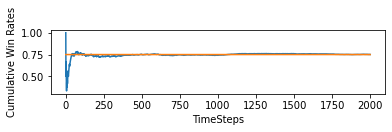

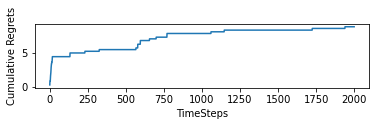

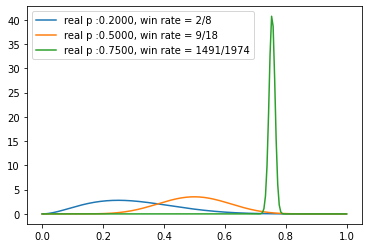

In [8]:
############ TEST CASE#################
NUM_TRIALS = 2000
banditsProbs = [0.2, 0.5, 0.75]
rewards = np.zeros(NUM_TRIALS)
regrets = np.zeros(NUM_TRIALS)


bandits = [bandit(x) for x in banditsProbs]
optimalArm = np.argmax([b.prob for b in bandits])

i=0
while i < NUM_TRIALS :
    arm = Bayesian([b.sample() for b in bandits])
    curReward = bandits[arm].pull()
    bandits[arm].update(curReward)
    rewards[i] = curReward
    regrets[i] = banditsProbs[optimalArm] - banditsProbs[arm]
    i=i+1
    
    
    

print("Distributions are: " ,[[b.alpha,b.beta] for b in bandits])
#print("Best arm out of",len(bandits) ,"arm is: ", np.argmax([b.qValue for b in bandits])+1 )
print("num of times we've selected the bandits: ",[b.count for b in bandits])        
print("total reward is: ",rewards.sum())
print("Win rate: ",rewards.sum()/NUM_TRIALS)

cumulativeRewards = np.cumsum(rewards)
winRates = cumulativeRewards/(np.arange(NUM_TRIALS)+1)

plt.subplot(3,1,1)
plt.plot(winRates)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Win Rates")
plt.plot(np.ones(NUM_TRIALS)*np.max(banditsProbs))
plt.show()

regrets = np.cumsum(regrets) #cumulative rewards loss due to the need of learning
plt.subplot(3,1,2)
plt.plot(regrets)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Regrets")
plt.show()
#plt.subplot(3,1,3)
x = np.linspace(0,1,200)
for b in bandits:
    y = beta.pdf(x,b.alpha,b.beta)
    plt.plot(x,y,label = f"real p :{b.prob:.4f}, win rate = {b.alpha-1}/{b.count}")
    plt.legend()
plt.show()



In [5]:
#Note : sub-optimal badnits remain fat dist's i.e. they haven't been explored that much, which is a good thing.
#       They only get pushed down far enough so that their posteriors
#       have very little probabilitiy mass beyond the peak of the optimal bandit (their means are not better
#       than the optimal bandit)